In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=16 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)
# Forward pass
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Training and testing functions
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = nn.CrossEntropyLoss()(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 10000 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset), 100. * batch_idx / len(train_loader), loss.item()))

# Testing function
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += nn.CrossEntropyLoss()(output, target).item()
            pred = output.data.max(1)[1]
            correct += pred.eq(target.view(-1)).sum().item()
# Average loss
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))

# Main execution
if __name__ == '__main__':
# Data loaders
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    kwargs = {'batch_size': 4, 'shuffle': True, 'num_workers': 4, 'pin_memory': True} if device.type == 'cuda' else {}
    train_loader = torch.utils.data.DataLoader(datasets.MNIST('data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()])), **kwargs)
    test_loader = torch.utils.data.DataLoader(datasets.MNIST('data', train=False, transform=transforms.Compose([transforms.ToTensor()])), **kwargs)
# Initialize the model
    model = Net().to(device)
# Optimizer
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
# Training loop
    epochs = 1
    for epoch in range(epochs):
        train(model, device, train_loader, optimizer, epoch)
        test(model, device, test_loader)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.277855
Train Epoch: 0 [10000/60000 (17%)]	Loss: 0.000366
Train Epoch: 0 [20000/60000 (33%)]	Loss: 0.000006
Train Epoch: 0 [30000/60000 (50%)]	Loss: 0.000019
Train Epoch: 0 [40000/60000 (67%)]	Loss: 0.001983
Train Epoch: 0 [50000/60000 (83%)]	Loss: 0.000000

Test set: Average loss: 0.1209, Accuracy: 9663/10000 (97%)



In [5]:

import matplotlib.pyplot as plt
weights_conv1=model.conv1.weight.data
print(weights_conv1.shape)

torch.Size([6, 1, 5, 5])


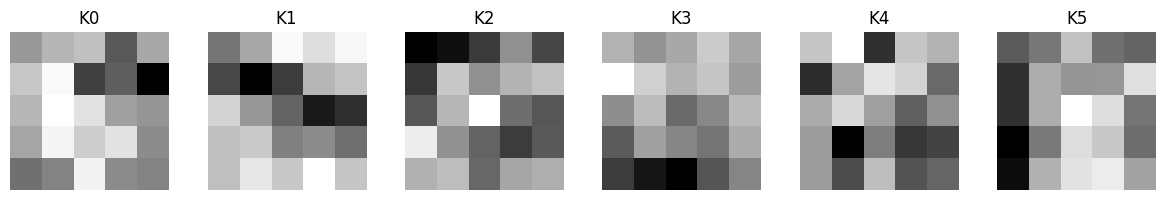

In [15]:
fig, axes = plt.subplots(1, 6, figsize=(12, 2))
for i in range(6):
    kernel = w[i, 0]  # [kH, kW]
    axes[i].imshow(kernel, cmap="gray")
    axes[i].axis("off")
    axes[i].set_title(f"K{i}")
plt.tight_layout()
plt.show()


In [22]:
X,y=test_loader.dataset[0]
print(X.shape)
X=X.unsqueeze(0).to(device)  # add batch dimension，
#维度必须是(batch, channel, height, width)
print(X.shape)
with torch.no_grad():
    output=model.conv1(X)
w=output.cpu().squeeze(0)  # remove batch dimension
w.shape


torch.Size([1, 28, 28])
torch.Size([1, 1, 28, 28])


torch.Size([6, 24, 24])

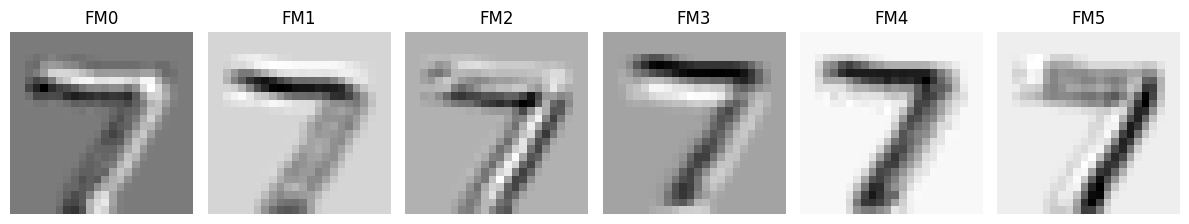

In [17]:
fig, axes = plt.subplots(1, 6, figsize=(12, 3))
for i in range(6):
    feature_map = w[i, :, :]  # [H, W]
    axes[i].imshow(feature_map, cmap="gray")
    axes[i].axis("off")
    axes[i].set_title(f"FM{i}")
plt.tight_layout()
plt.show()

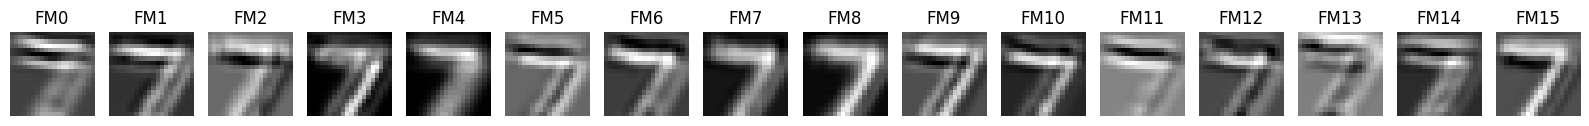

In [23]:
X,y=test_loader.dataset[0]
X=X.unsqueeze(0).to(device)  # add batch dimension
with torch.no_grad():
    temp=model.conv1(X)
    output=model.conv2(temp)
w=output.cpu().squeeze(0)  # remove batch dimension
w.shape
fig, axes = plt.subplots(1, 16, figsize=(16, 3))
for i in range(16):
    feature_map = w[i, :, :]  # [H, W]
    axes[i].imshow(feature_map, cmap="gray")
    axes[i].axis("off")
    axes[i].set_title(f"FM{i}")
plt.tight_layout()
plt.show()